## scikit-learn으로 실습

In [7]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
dataset = load_breast_cancer()

train = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = pd.DataFrame(dataset.target, columns=['cancer'])

data = pd.concat([train, target] ,axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
#학습용 데이터/ 검증용 데이터 생성

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data[['mean radius']],data['cancer'], random_state=42)
print(x_train)
print('\n')
print(y_train)
print('\n')

     mean radius
287       12.890
512       13.400
402       12.960
446       17.750
210       20.580
..           ...
71         8.888
106       11.640
270       14.290
435       13.980
102       12.180

[426 rows x 1 columns]


287    1
512    0
402    1
446    0
210    0
      ..
71     1
106    1
270    1
435    0
102    1
Name: cancer, Length: 426, dtype: int32




## Logistic Regression 파라미터
* penalty - 비용함수(l1, l2, elasticnet, none)를 지정 .default='l2'
* dual - Dual Formulation 인지 Promal Formulation인지 결정. default=False
* tol - 중지 기준에 대한 허용 오차값
* C - 규칙강도의 역수값. default=1.0 , 작을 수록 정규화가 강해진다.
* fit_intercept - 결정 함수에 상수(bias)를 추가할지 결정, default=True
* intercept_scaling - default = 1
* class_weight - 클래스의 가중치 설정(dict or 'balanced'). default = None
* solver - 최적화에 사용할 알고리즘('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'). default='lbfgs'
* max_iter - solver의 수렴에 걸릴 최대 반복 횟수. default = 100
* multi_class - ovr: 이진 문제, multinomial: 다항 문제 적합. default = 'auto'
* verbose - 로그 정보 출력
* warm_start - 이전 호출에 사용했던 solution을 재사용할지 여부 결정. default = False
* n_jobs - 병렬처리시 사용할 cpu코어 수
* l1_ratio - default=None
* random_state - 난수 시드 설정

In [9]:
# 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression

#solver : 최적화에 사용할 알고리즘 설정
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train, y_train)

#모델 예측 및 평가
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
print('mean radius 만으로 예측한 결과: ',pred)
accuracy_score(y_test,pred)


mean radius 만으로 예측한 결과:  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1]


0.916083916083916

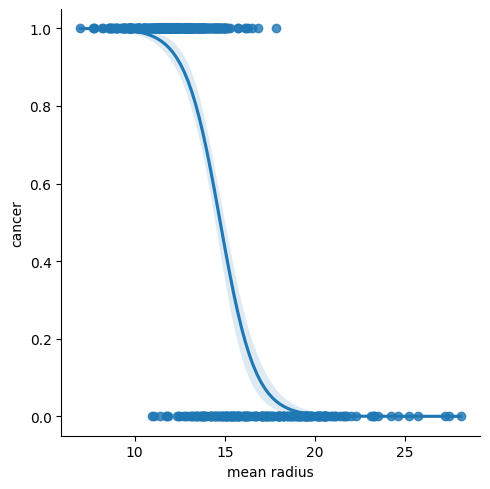

In [10]:
#모델 그리기:mean radius 피처가 타겟을 어떻게 분류했는지 확인
from seaborn import lmplot
import matplotlib.pyplot as plt
lmplot(x='mean radius', y='cancer', data=data, logistic=True)
plt.show()

In [5]:
#전체 데이터로 모델 학습 및 평가
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:, :-1],data.loc[:,'cancer'],random_state=42)


model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(f'전체 데이터로 예측한 결과: {score}')

전체 데이터로 예측한 결과: 0.958041958041958


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

S_scaler = StandardScaler()
M_scaler = MinMaxScaler()

S_scalerData = S_scaler.fit_transform(x_train)
S_scalerDataY = S_scaler.fit_transform(x_test)

M_scalerData = M_scaler.fit_transform(x_train)
M_scalerDataY = M_scaler.fit_transform(x_test)


## standart scaler로 학습

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:, :-1],data['cancer'], random_state=42)
model = LogisticRegression(solver = 'liblinear')
model.fit(S_scalerData, y_train)

score = model.score(S_scalerDataY, y_test)
print('전체 데이터로 예측한 결과: ',score)

전체 데이터로 예측한 결과:  0.986013986013986


## minmax scaler로 학습

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:, :-1],data['cancer'], random_state=42)
model = LogisticRegression(solver = 'liblinear')
model.fit(M_scalerData, y_train)

score = model.score(M_scalerDataY, y_test)
print('전체 데이터로 예측한 결과: ',score)

전체 데이터로 예측한 결과:  0.958041958041958


# 타이타닉 데이터 실습

In [9]:
#ver 1

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
feature_names = ['pclass', 'age', 'sex']
dfX = df[feature_names].copy()
dfY = df['survived'].copy()

dfX['sex'] = LabelEncoder().fit_transform(dfX['sex'])
dfX['age'].fillna(dfX['age'].mean(), inplace=True)
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [11]:
x_train,x_test,y_train,y_test = train_test_split(dfX, dfY, test_size=0.3, random_state = 1)

log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)
log_clf.score(x_test,y_test)

0.7761194029850746

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

S_scaler = StandardScaler()
M_scaler = MinMaxScaler()

S_scalerData = S_scaler.fit_transform(x_train)
S_scalerDataY = S_scaler.fit_transform(x_test)

M_scalerData = M_scaler.fit_transform(x_train)
M_scalerDataY = M_scaler.fit_transform(x_test)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(dfX, dfY, test_size=0.3, random_state = 1)

log_clf = LogisticRegression()
log_clf.fit(S_scalerData, y_train)
log_clf.score(S_scalerDataY,y_test)

0.7611940298507462

In [14]:
x_train,x_test,y_train,y_test = train_test_split(dfX, dfY, test_size=0.3, random_state = 1)

log_clf = LogisticRegression()
log_clf.fit(M_scalerData, y_train)
log_clf.score(M_scalerDataY,y_test)

0.7686567164179104

# 인터넷 신규 가입 여부 예측 실습
* 데이터 - newbie.csv
* 종속변수 - Newbie
* 독립변수제거 - who, country, years on internet

In [31]:
import pandas as pd

df = pd.read_csv('./AI머신러닝데이터/newbie.csv')
df

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo
3,id87028,1,22.0,Female,$40-49,Heterosexual,Florida,Some College,Computer,Married,6-12 mo
4,id76087,0,20.0,Male,$30-39,Bisexual,New Jersey,Some College,Education,Single,1-3 yr
...,...,...,...,...,...,...,...,...,...,...,...
19578,id83400,0,22.0,Male,Over $100,Heterosexual,Texas,Some College,Education,Single,4-6 yr
19579,id72216,0,19.0,Male,NaN,Heterosexual,New Jersey,Some College,Education,Single,4-6 yr
19580,id8654,0,49.0,Female,$50-74,Heterosexual,Missouri,Doctoral,Education,Married,1-3 yr
19581,id84503,1,42.0,Female,$50-74,Heterosexual,Kentucky,Some College,Other,Married,Under 6 mo


In [32]:
df.drop(['who','Country','Years on Internet'],axis=1, inplace=True)
df

,Newbie,Age,Gender,Household Income,Sexual Preference,Education Attainment,Major Occupation,Marital Status
0,0,54.0,Male,$50-74,Gay male,Some College,Computer,Other
1,0,39.0,Female,Over $100,Heterosexual,Professional,Other,Other
2,1,49.0,Female,$40-49,Heterosexual,Some College,Management,Other
3,1,22.0,Female,$40-49,Heterosexual,Some College,Computer,Married
4,0,20.0,Male,$30-39,Bisexual,Some College,Education,Single
...,...,...,...,...,...,...,...,...
19578,0,22.0,Male,Over $100,Heterosexual,Some College,Education,Single
19579,0,19.0,Male,NaN,Heterosexual,Some College,Education,Single
19580,0,49.0,Female,$50-74,Heterosexual,Doctoral,Education,Married
19581,1,42.0,Female,$50-74,Heterosexual,Some College,Other,Married


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19583 entries, 0 to 19582
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Newbie                19583 non-null  int64  
 1   Age                   19022 non-null  float64
 2   Gender                19583 non-null  object 
 3   Household Income      19583 non-null  object 
 4   Sexual Preference     19583 non-null  object 
 5   Education Attainment  19583 non-null  object 
 6   Major Occupation      19583 non-null  object 
 7   Marital Status        19583 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [33]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19583 entries, 0 to 19582
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Newbie                19583 non-null  int64  
 1   Age                   19583 non-null  float64
 2   Gender                19583 non-null  object 
 3   Household Income      16398 non-null  object 
 4   Sexual Preference     18291 non-null  object 
 5   Education Attainment  19583 non-null  object 
 6   Major Occupation      19583 non-null  object 
 7   Marital Status        19240 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [34]:
df['Household Income'].fillna('$50-74', inplace=True)
df['Sexual Preference'].fillna('Heterosexual', inplace=True)
df['Marital Status'].fillna('Married', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19583 entries, 0 to 19582
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Newbie                19583 non-null  int64  
 1   Age                   19583 non-null  float64
 2   Gender                19583 non-null  object 
 3   Household Income      19583 non-null  object 
 4   Sexual Preference     19583 non-null  object 
 5   Education Attainment  19583 non-null  object 
 6   Major Occupation      19583 non-null  object 
 7   Marital Status        19583 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [35]:
df

,Newbie,Age,Gender,Household Income,Sexual Preference,Education Attainment,Major Occupation,Marital Status
0,0,54.0,Male,$50-74,Gay male,Some College,Computer,Other
1,0,39.0,Female,Over $100,Heterosexual,Professional,Other,Other
2,1,49.0,Female,$40-49,Heterosexual,Some College,Management,Other
3,1,22.0,Female,$40-49,Heterosexual,Some College,Computer,Married
4,0,20.0,Male,$30-39,Bisexual,Some College,Education,Single
...,...,...,...,...,...,...,...,...
19578,0,22.0,Male,Over $100,Heterosexual,Some College,Education,Single
19579,0,19.0,Male,$50-74,Heterosexual,Some College,Education,Single
19580,0,49.0,Female,$50-74,Heterosexual,Doctoral,Education,Married
19581,1,42.0,Female,$50-74,Heterosexual,Some College,Other,Married


In [36]:
df['Household Income'] = df['Household Income'].astype('category')
df['Sexual Preference'] = df['Sexual Preference'].astype('category')
df['Education Attainment'] = df['Education Attainment'].astype('category')
df['Major Occupation'] = df['Major Occupation'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [37]:
df

,Newbie,Age,Gender,Household Income,Sexual Preference,Education Attainment,Major Occupation,Marital Status
0,0,54.0,Male,$50-74,Gay male,Some College,Computer,Other
1,0,39.0,Female,Over $100,Heterosexual,Professional,Other,Other
2,1,49.0,Female,$40-49,Heterosexual,Some College,Management,Other
3,1,22.0,Female,$40-49,Heterosexual,Some College,Computer,Married
4,0,20.0,Male,$30-39,Bisexual,Some College,Education,Single
...,...,...,...,...,...,...,...,...
19578,0,22.0,Male,Over $100,Heterosexual,Some College,Education,Single
19579,0,19.0,Male,$50-74,Heterosexual,Some College,Education,Single
19580,0,49.0,Female,$50-74,Heterosexual,Doctoral,Education,Married
19581,1,42.0,Female,$50-74,Heterosexual,Some College,Other,Married


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19583 entries, 0 to 19582
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Newbie                19583 non-null  int64   
 1   Age                   19583 non-null  float64 
 2   Gender                19583 non-null  category
 3   Household Income      19583 non-null  category
 4   Sexual Preference     19583 non-null  category
 5   Education Attainment  19583 non-null  category
 6   Major Occupation      19583 non-null  category
 7   Marital Status        19583 non-null  category
dtypes: category(6), float64(1), int64(1)
memory usage: 422.3 KB


In [39]:
dfdummy =pd.get_dummies(df)

x = dfdummy.iloc[:,1:]
y = dfdummy.iloc[:,0:1]


In [40]:
from sklearn.model_selection import train_test_split #트레인과 test 비율 나눔

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [41]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

c:\Project\AI_Source\AI_01\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7615990662386928
0.7511489361702127


c:\Project\AI_Source\AI_01\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

S_scaler = StandardScaler()
M_scaler = MinMaxScaler()

S_scalerData = S_scaler.fit_transform(x_train)
S_scalerDataY = S_scaler.fit_transform(x_test)

M_scalerData = M_scaler.fit_transform(x_train)
M_scalerDataY = M_scaler.fit_transform(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=42)
lr.fit(S_scalerData, y_train)

print(lr.score(S_scalerData, y_train))
print(lr.score(S_scalerDataY, y_test))

0.761744966442953
0.7502978723404256


c:\Project\AI_Source\AI_01\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=42)
lr.fit(M_scalerData, y_train)

print(lr.score(M_scalerData, y_train))
print(lr.score(M_scalerDataY, y_test))

c:\Project\AI_Source\AI_01\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7616720163408228
0.7525106382978723
